<a href="https://colab.research.google.com/github/leeyoubin112/AI-PROJECT/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영화 관객수 예측 모델 프로젝트

2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터를 가진 train 데이터를 활용하여 test 데이터에 대한 관객수를 예측하는 프로젝트입니다.

##데이터 설명

1.title - 영화의 제목 

2.distributor - 배급사 

3.genre - 장르 

4.release_time - 개봉일

5.time - 상영시간(분)

6.screening_rat - 상영등급

7.director - 감독이름

8.dir_prev_bfnum - 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

9.dir_prev_num - 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

10.num_staff - 스텝수

11.num_actor - 주연 배우수

12.box_off_num - 관객수

1. 라이브러리 및 Data set 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
train = pd.read_csv("movies_train.csv")
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train['title'].duplicated().sum()

0

train, 테스트 데이텃 셋에 7번  dir_prev_bfnum에 결측값 존재하고 중복데이터는 존재 하지않는다.

In [ ]:
#결측값 제거
train[train['dir_prev_bfnum'].isna()]['dir_prev_num']
test[test['dir_prev_bfnum'].isna()]['dir_prev_num']

5      0
6      0
7      0
8      0
9      0
      ..
235    0
237    0
239    0
240    0
242    0
Name: dir_prev_num, Length: 136, dtype: int64

In [ ]:
train['box_off_num'].describe()

count    6.000000e+02
mean     7.081818e+05
std      1.828006e+06
min      1.000000e+00
25%      1.297250e+03
50%      1.259100e+04
75%      4.798868e+05
max      1.426277e+07
Name: box_off_num, dtype: float64

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


영화별 
평균 스태프 151명
평균 배우 3.7명
평균 시간 100분
평균 관객수 70만

In [ ]:
train['box_off_num'].describe()

count        600.0
mean      708181.8
std      1828005.9
min            1.0
25%         1297.2
50%        12591.0
75%       479886.8
max     14262766.0
Name: box_off_num, dtype: float64

총 600개의 데이터

평균관객수 : 708181.8 약 70만

표준편차 : 1828006 약 180만

min : 1

max : 약 1400만

이러한 데이터로 이루어져 있습니다.

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


느와르, 액션 sf 코미디 순으로 관객수가 높다

In [ ]:
sort_box = train.sort_values(by='box_off_num')
sort_box["box_off_num"][:300].describe()

count     300.0
mean     2493.3
std      2878.9
min         1.0
25%       538.8
50%      1296.5
75%      3250.5
max     12486.0
Name: box_off_num, dtype: float64

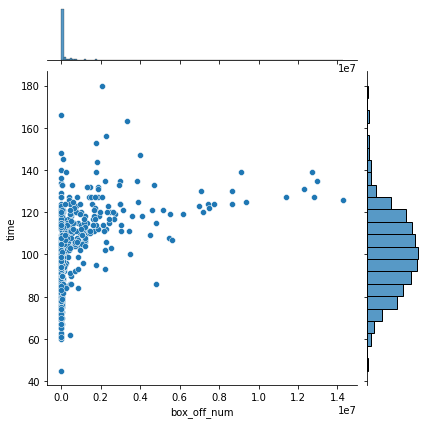

In [ ]:
#시간과 관객의 관계
sns.jointplot(x="box_off_num",y="time", data=train)

120~140분 관객 많고, 80분 이하로는 적어짐

#상관관계 확인

In [ ]:
pd.reset_option('display.float_format')
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


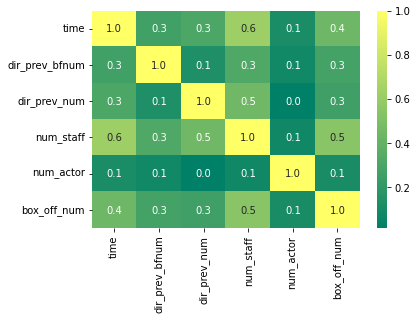

In [ ]:
sns.heatmap(train.corr(), annot = True,fmt = '.1f', cmap="summer")

관객수의 관계가 깊은 변수들을 확인해보니
선형관계가 강한것은 영화 제작에 참여한 스태프수가 많을수록 영화 관객수가 많아지는 경향이 있습니다.
투입 자원이 큰 영화 일수록 그만큼의 마케팅이나 상영 횟수가 일반적으로 많다
상영시간이 길수록 관객수도 증가하는 히트맵

#Feature Engineering

모델 학습 및 검증
LightGMB

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state = 42, n_estimators = 1000)

In [ ]:
feature = ["time", "dir_prev_num","num_staff","num_actor"]
target = ["box_off_num"]

In [ ]:
!pip install scikit-learn==0.24.2
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
le = preprocessing.LabelEncoder()
train.genre

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = teat[features]

In [ ]:
model = lgb.LGBMRegressor(random_state = 45, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.94898e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 1.24775e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.12928e+12
Early stopping, best iteration is:
[51]	valid_0's l2: 9.70145e+11
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.34143e+12
Early stopping, best iteration is:
[37]	valid_0's l2: 2.26324e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70532e+12
[200]	valid_0's l2: 2.68141e+12
Early stopping, best iteration is:
[127]	valid_0's l2: 2.66817e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.22814e+12
Early stopping, best iteration is:
[39]	valid_0's l2: 3.07138e+12


LGBMRegressor모델을 만들어 보려 합니다.

어느 pc에서라도 결과값이 같게 random_state =42로 고정시켜주고

features라는 변수를 만들고 train의 수치형 변수들만 넣어줍니다.

그리고 y_train은 train에서 y값이라 할 수 있는 관객수를 넣어 주었습니다.

In [ ]:
X_train.shape

(600, 8)

모델 학습 및 검증

LightGBM 부스팅 모델 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나가게 함
순서

In [ ]:
train['dir_exp'] = train['dir_prev_num'] >= 1
train['dir_exp'].nunique()

2

In [ ]:
test['dir_exp'] = test['dir_prev_num'] >= 1
test['dir_exp'].nunique()

2

In [ ]:
model.fit(X_train, Y_train)

LGBMRegressor(n_estimators=1000, random_state=42)

In [ ]:
singleLGBM = submission.copy()

In [ ]:
singleLGBM.head()
singleLGBM["box_off_num"] = model.predict(X_test)
singleLGBM.head()

,title,box_off_num
0,용서는 없다,1.047472e+06
1,아빠가 여자를 좋아해,1.977669e+06
2,하모니,-2.028072e+06
3,의형제,3.517802e+06
4,평행 이론,5.647148e+05


그리고, 처음에 만든 모델을 가지고 X_train과 Y_train 데이터를 학습시키고, 학습시킨 모델로 X_test에 적용시켜 제출할 결과값을 만들었습니다.
음수 값이 나온 점에서 모델의 성능이 좋지않다는것을 알수 있었습니다.

#K_FOLD

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state = 45)

In [ ]:
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [ ]:
model=lgb.LGBMRegressor(random_state = 45, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.68198e+12
Early stopping, best iteration is:
[12]	valid_0's l2: 3.05053e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.05887e+12
Early stopping, best iteration is:
[91]	valid_0's l2: 3.0159e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.00974e+12
Early stopping, best iteration is:
[10]	valid_0's l2: 1.65492e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.58135e+12
Early stopping, best iteration is:
[25]	valid_0's l2: 2.04714e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.87528e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 1.33798e+12


In [ ]:
models

[LGBMRegressor(n_estimators=1000, random_state=45),
 LGBMRegressor(n_estimators=1000, random_state=45),
 LGBMRegressor(n_estimators=1000, random_state=45),
 LGBMRegressor(n_estimators=1000, random_state=45),
 LGBMRegressor(n_estimators=1000, random_state=45)]

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
kfoldLightGBM["box_off_num"] = np.mean(preds, axis = 0)

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,1.857480e+06
1,아빠가 여자를 좋아해,8.890344e+05
2,하모니,1.227155e+06
3,의형제,1.356173e+06
4,평행 이론,9.417537e+05


In [ ]:
kfoldLightGBM.to_csv("kfoldLightGBM.csv", index=False)

#fe

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()  
train["genre"] = le.fit_transform(train["genre"])
train["screening_rat"] = le.fit_transform(train["screening_rat"])

In [ ]:
train.genre

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
model=lgb.LGBMRegressor(random_state = 45, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.68198e+12
Early stopping, best iteration is:
[12]	valid_0's l2: 3.05053e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.05887e+12
Early stopping, best iteration is:
[91]	valid_0's l2: 3.0159e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.00974e+12
Early stopping, best iteration is:
[10]	valid_0's l2: 1.65492e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.58135e+12
Early stopping, best iteration is:
[25]	valid_0's l2: 2.04714e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.87528e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 1.33798e+12


In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

더 좋은 결과를 얻을수 있을까 대해 열심히 코딩해보았지만 실패 했습니다.

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = lgb.LGBMRegressor(random_state=45, n_estimators=1000)

In [ ]:

params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

gs = GridSearchCV(estimator=model,
                 param_grid=params,
                  scoring= 'neg_mean_squared_error',
                  cv = k_fold)

In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [ ]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=45),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [ ]:
model = lgb.LGBMRegressor(random_state=777,n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.32321e+12
[200]	valid_0's l2: 3.19172e+12
[300]	valid_0's l2: 3.13764e+12
[400]	valid_0's l2: 3.08102e+12
[500]	valid_0's l2: 3.06133e+12
Early stopping, best iteration is:
[482]	valid_0's l2: 3.06091e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.57876e+12
[200]	valid_0's l2: 4.15432e+12
[300]	valid_0's l2: 3.87312e+12
[400]	valid_0's l2: 3.69749e+12
[500]	valid_0's l2: 3.56942e+12
[600]	valid_0's l2: 3.47734e+12
[700]	valid_0's l2: 3.41709e+12
[800]	valid_0's l2: 3.37792e+12
[900]	valid_0's l2: 3.35186e+12
[1000]	valid_0's l2: 3.33405e+12
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 3.33405e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.88562e+12
[200]	valid_0's l2: 1.65603e+12
[300]	valid_0's l2: 1.58497e+12
[400]	valid_0's l2: 1.56995e+12
[500]	valid_0's l2: 1.57126e+12
Early stopping, best i

In [ ]:
gs.best_params_

In [ ]:
model = lgb.LGBMRegressor(random_state=45,n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

-----------------------------------------------



끝

In [ ]:

!pip install scikit-learn==0.24.2
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 92.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 853 kB/s 


In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()  #문자열 값을 전부 숫자로 변경해주는것
train["genre"] = le.fit_transform(train["genre"]) #변경해주는것 학습
train["screening_rat"] = le.fit_transform(train["screening_rat"])


In [ ]:

train.genre  #장르 값들이 숫자로 변경

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:

train.screening_rat

0      3
1      3
2      1
3      2
4      1
      ..
595    3
596    1
597    3
598    1
599    1
Name: screening_rat, Length: 600, dtype: int64

In [ ]:
test["genre"] = le.fit_transform(test["genre"])


In [ ]:
test["screening_rat"] = le.fit_transform(test["screening_rat"])


In [ ]:

test.genre

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int64

In [ ]:
test.screening_rat


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [ ]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state = 42) 

In [ ]:

# 600개에서 4:1의 비율로 train / test로 나누어짐
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [ ]:
model = lgb.LGBMRegressor(random_state = 42, n_estimators=1000)
models = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.94898e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 1.24775e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.12928e+12
Early stopping, best iteration is:
[51]	valid_0's l2: 9.70145e+11
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.34143e+12
Early stopping, best iteration is:
[37]	valid_0's l2: 2.26324e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70532e+12
[200]	valid_0's l2: 2.68141e+12
Early stopping, best iteration is:
[127]	valid_0's l2: 2.66817e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.22814e+12
Early stopping, best iteration is:
[39]	valid_0's l2: 3.07138e+12


In [ ]:
models

[LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42),
 LGBMRegressor(n_estimators=1000, random_state=42)]

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
kfoldLightGBM = submission.copy()

In [ ]:
preds

[array([ 2.56629410e+06,  7.55919556e+05,  8.16788948e+05,  1.66914538e+06,
         1.35982086e+06,  8.16046652e+04,  8.40486057e+04,  7.09833325e+04,
         3.20264464e+04,  1.09156813e+06,  1.05110905e+06,  1.42125310e+06,
         9.90764526e+05, -1.79922771e+04,  6.80917600e+05,  3.62767531e+06,
        -7.70203286e+04,  2.99729969e+06,  3.68965036e+05,  4.01611978e+05,
        -1.22705611e+05,  1.37366138e+05,  6.07341936e+05,  2.14688645e+05,
         3.97673889e+04,  1.70308492e+06,  2.55187375e+04,  1.30681824e+06,
         9.56731184e+04,  3.19099344e+05,  2.10685945e+06,  3.97451734e+04,
         3.52346117e+05,  1.67535697e+06,  3.53908573e+04,  3.97673889e+04,
         8.70300435e+04,  2.43802410e+04,  5.47312057e+04,  2.59445108e+04,
         3.21772437e+05,  5.79709536e+04,  5.92683469e+04,  1.02212176e+06,
         6.33179512e+05,  1.11832815e+06, -6.66165777e+04,  1.17469551e+05,
         1.36203733e+06,  2.13928710e+04,  1.30720933e+04,  8.88599091e+05,
         1.4

In [ ]:
kfoldLightGBM["box_off_num"] = np.mean(preds, axis = 0) 

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,2.566294e+06
1,아빠가 여자를 좋아해,7.559196e+05
2,하모니,8.167889e+05
3,의형제,1.669145e+06
4,평행 이론,1.359821e+06


In [ ]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]

In [ ]:
model2 = xgb.XGBRegressor(random_state=42)
models2 = [ ]
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = Y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = Y_train.iloc[val_idx]
    models2.append(model2.fit(x_t, y_t, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose = 100))

[03:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.38325e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[99]	validation_0-rmse:1.37776e+06
[03:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.38265e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[99]	validation_0-rmse:1.3733e+06
[03:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.03598e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[99]	validation_0-rmse:1.50907e+06
[03:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.05523e+06
Will train until validation_0-rmse hasn't improved in 